Blank nlp pipeline

In [ ]:
import spacy
nlp=spacy.blank("en")
doc=nlp("Captain america ate 100$ of samosa. Then he said i can do this all day.")
for token in doc:
  print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
i
can
do
this
all
day
.


We get above error because we have a blank pipeline as shown below. Pipeline is something that starts with a Tokenizer component in a dotted rectange below. You can see there is nothing there hence the blank pipeline



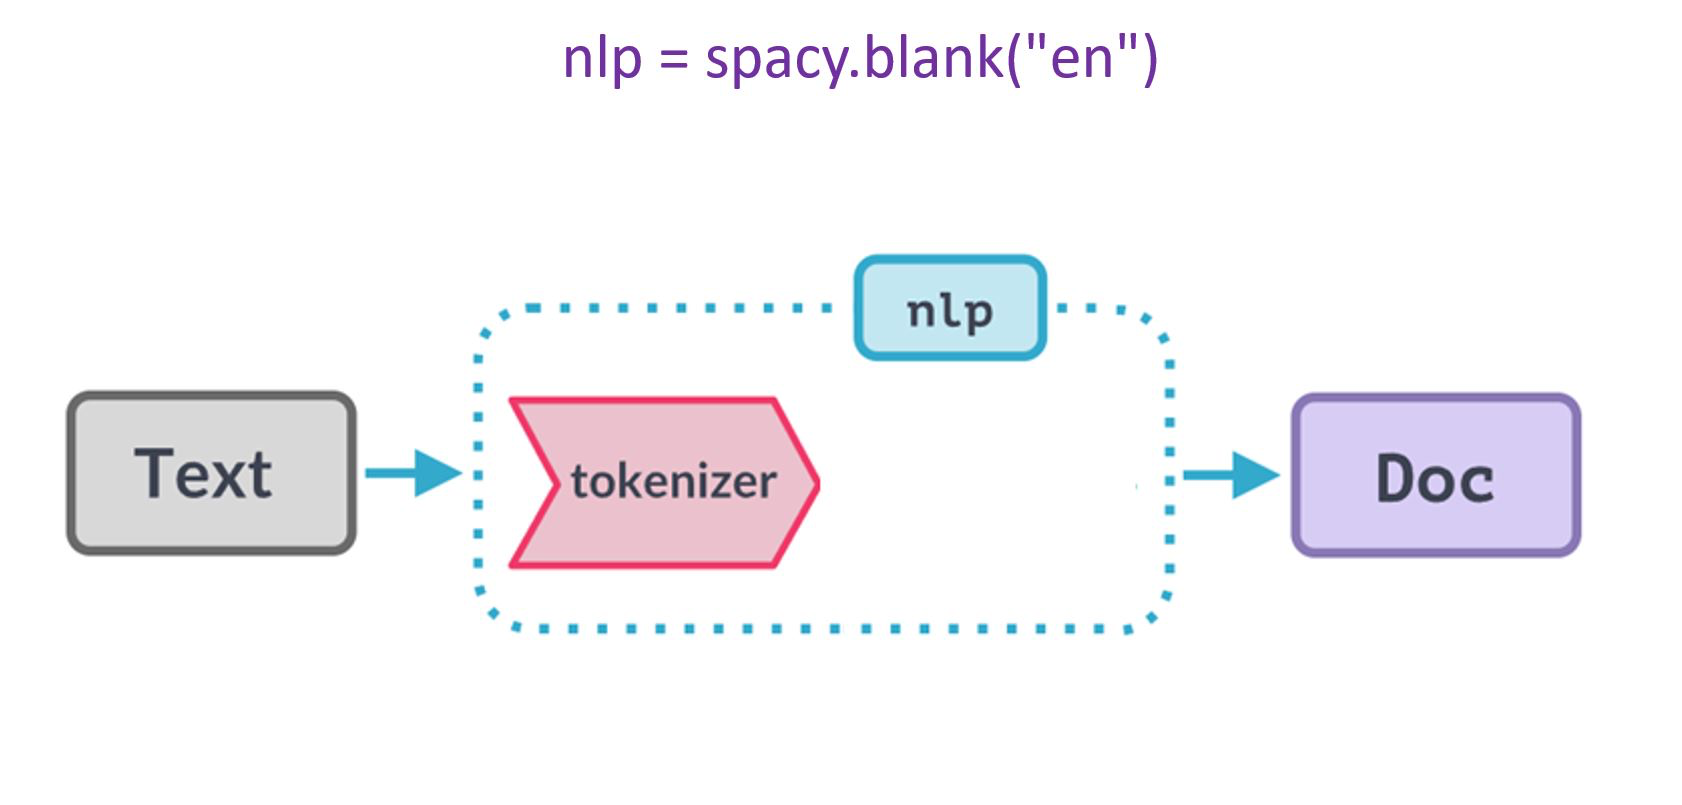

In [ ]:
nlp.pipe_names

[]

nlp.pipe_names is empty array indicating no components in the pipeline. Pipeline is something that starts with a tokenizer

More general diagram for nlp pipeline may look something like below


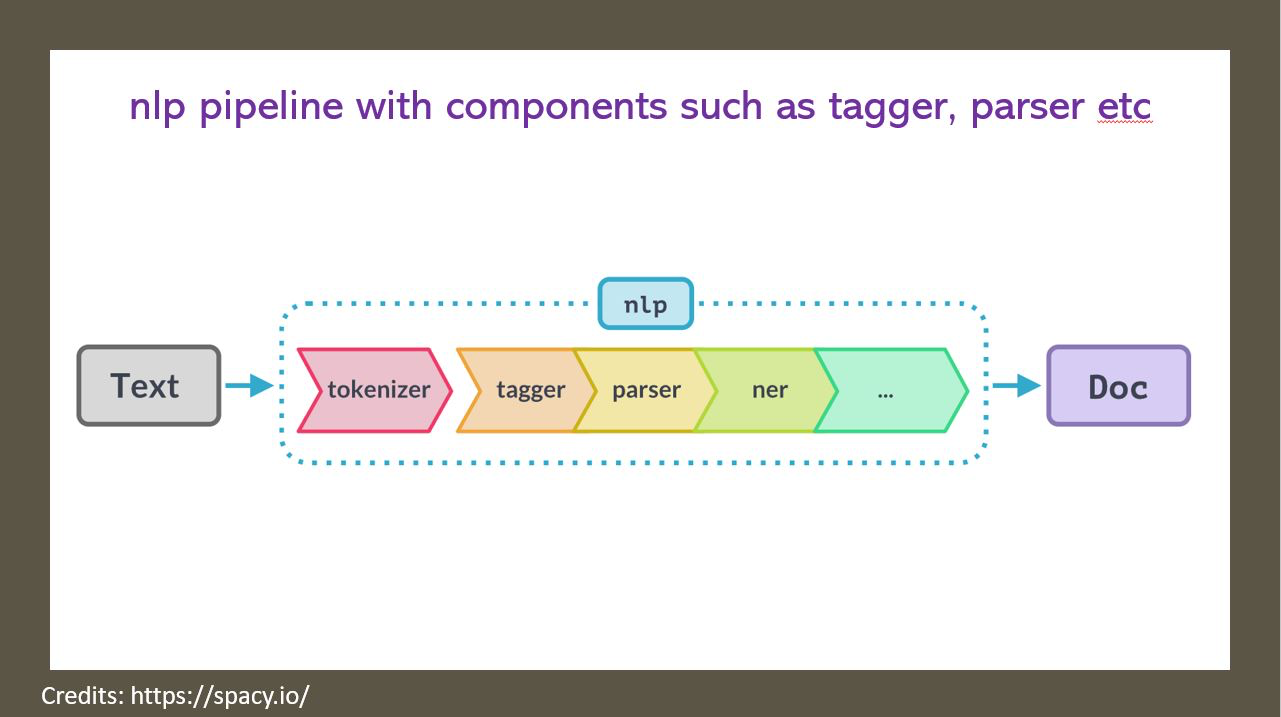![image.png](
  
)
Download trained pipeline
To download trained pipeline use a command such as,

python -m spacy download en_core_web_sm

This downloads the small (sm) pipeline for english language

Further instructions on : https://spacy.io/usage/models#quickstart


In [ ]:
nlp=spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7a27db111f10>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7a27db1129f0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7a27daf24190>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7a27de6e2fd0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7a27daf04710>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7a27daf247b0>)]

In [ ]:
doc=nlp("Captain america ate 100$ of samso. Then he said I can do this all day.")

for token in doc:
  print(token, "|", spacy.explain(token.pos_), "|", token.lemma_) # it has parts of speech and lemmatizer

Captain | proper noun | Captain
america | proper noun | america
ate | verb | eat
100 | numeral | 100
$ | numeral | $
of | adposition | of
samso | noun | samso
. | punctuation | .
Then | adverb | then
he | pronoun | he
said | verb | say
I | pronoun | I
can | auxiliary | can
do | verb | do
this | pronoun | this
all | determiner | all
day | noun | day
. | punctuation | .


In [ ]:
doc=nlp("Captain america ate 100$ of samso. Then he said I can do this all day.")

for ent in doc.ents:
  print(ent.text, ent.label_) # entity

Named Entity Recognition

In [ ]:
doc1 = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
doc = nlp("Captain america ate 100$ of samso. Then he said I can do this all day.")

for ent in doc.ents:
  print(ent.text, ent.label_) # entity


As you can see from the re-execution above, the `en_core_web_sm` model detected **'Captain america'** as a `PERSON` and **'100$'** as `MONEY`.

Here's a breakdown of why you might have seen an empty output previously or why some other parts were not detected:

*   **'Captain america'**: While often written as 'Captain America', even with slightly off capitalization, spaCy's `en_core_web_sm` model can sometimes correctly identify common proper nouns like this as a `PERSON` entity. If your previous output was empty, it might have been an anomaly or the model was more sensitive to the exact casing. However, in the re-run, it correctly identified it.
*   **'100$'**: This is a clear monetary value, and the model typically recognizes it as a `MONEY` entity. It was correctly identified in the re-run. If your previous output was empty, it was likely an unexpected behavior.
*   **'samso'**: This appears to be a misspelling of 'samosa'. Since it's not a standard word or a commonly recognized named entity (like a product name or organization), the model would not typically identify it as an entity.

General-purpose spaCy models like `en_core_web_sm` are trained on a broad range of text and are good at identifying common entities. For very specific, niche, or misspelled entities, you might need to fine-tune a model or use custom entity recognition.

In [ ]:
from spacy import displacy
displacy.render(doc1,style="ent")

Trained processing pipeline in French


You need to install the processing pipeline for french language using this command,

python -m spacy download fr_core_news_sm

In [ ]:
!python -m spacy download fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 27.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
doc = nlp("Tesla Inc va racheter Twitter pour $45 milliards de dollars")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Tesla Inc  |  PER  |  Named person or family.
Twitter  |  MISC  |  Miscellaneous entities, e.g. events, nationalities, products or works of art


Adding a component to a blank pipeline


In [ ]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']

In [ ]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


In below image you can see sentecizer component in the pipeline

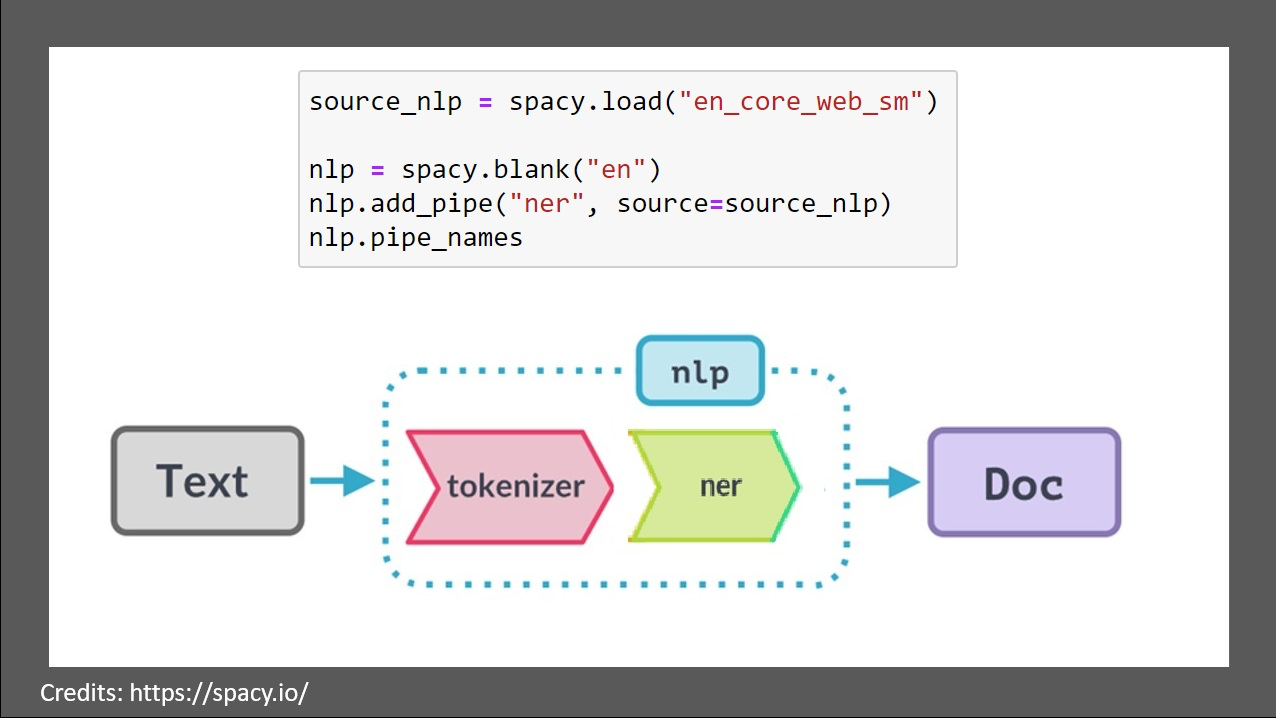
